### Analysis of the whole system trajectories
Mostly because we are curious regarding the distribution in the case of the frequency of $f=1.5 \text{ Hz}$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
from scipy.stats import norm
from matplotlib.animation import FuncAnimation

# Parameters of the Simulation
tot_time = 180
t_stat = 10 # We suppose at this time the system got into an stationary state
tot_runs = 100
fmag = 7.2

# Extract Relevant Data from Sample
dir_sample = r"./mag&freq/" + r"/data_fmag1_ffreq3_2runs/" + "results.csv"
sample = pd.read_csv(dir_sample)
tot_frames = len(sample["frame"].tolist())/2
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))

# General data for stationary analysis
t_stat_idx = np.argmin(np.abs(time_array - t_stat))
n_data = len(time_array[t_stat_idx:-1])

Import the `.csv` with the whole systems' positions, so that we can filter a run number and see the trajectory.

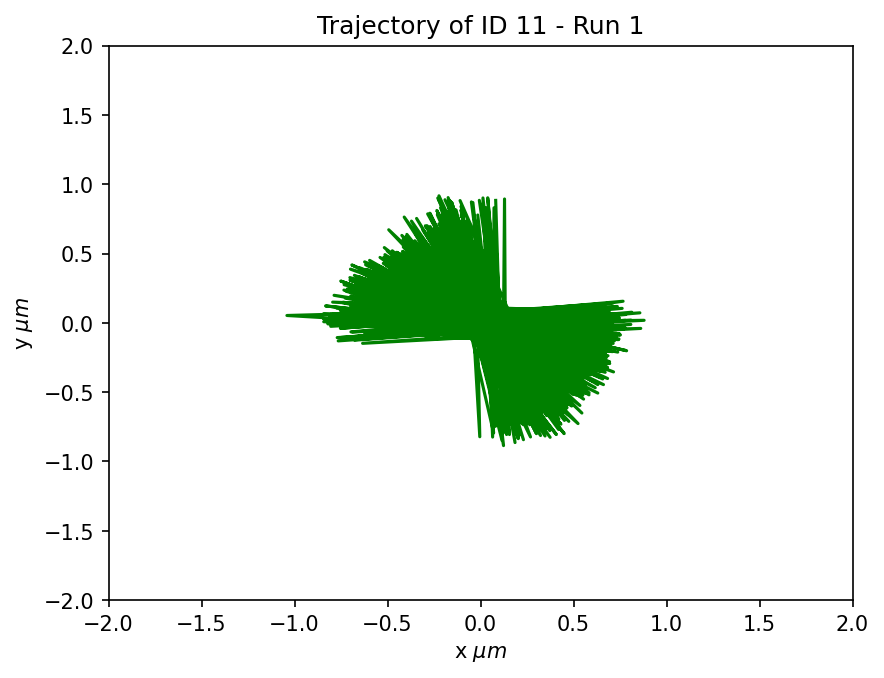

In [13]:
track_id = 11

# Leer datos
dir_data = f"./current/data_wholesys_fmag{fmag}_ffreq1.5_{tot_runs}runs/results.csv"
data = pd.read_csv(dir_data)

# Setup de la figura
fig, ax = plt.subplots(dpi=150)
line, = ax.plot([], [], color="g")
title = ax.set_title("")
ax.set_xlabel(r"x $\mu{}m$")
ax.set_ylabel(r"y $\mu{}m$")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Función de actualización para cada frame (run)
def update(run):
    part = data[(data["run_number"] == run) & (data["id"] == track_id)]
    if part.empty:
        line.set_data([], [])
        title.set_text(f"Run {run}: ID {track_id} not found")
        return line, title

    x = np.array(part.x_pos.tolist())
    x = x - x[0]
    y = np.array(part.y_pos.tolist())
    y = y - y[0]
    line.set_data(x, y)
    title.set_text(f"Trajectory of ID {track_id} - Run {run}")
    return line, title

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(1, tot_runs + 1), interval=200)

# Mostrarla inline (si estás en Jupyter)
from IPython.display import HTML
HTML(anim.to_jshtml())

In [16]:
data[data["run_number"] == 44]

run_number    seed  id    frame      x_pos     y_pos
581575          44  693999   1        0  -9.060920 -9.060920
581576          44  693999   1     3330 -10.411600 -9.472120
581577          44  693999   1     6660  -9.518460 -8.199900
581578          44  693999   1     9990  -9.805960 -8.846810
581579          44  693999   1    13320  -9.575630 -8.898130
...            ...     ...  ..      ...        ...       ...
595095          44  693999  25  1784880  12.231421  5.273340
595096          44  693999  25  1788210  13.372017  7.467720
595097          44  693999  25  1791540  12.343319  5.127930
595098          44  693999  25  1794870  13.316980  7.432440
595099          44  693999  25  1798200  12.277517  5.344349

[13525 rows x 6 columns]